### Data Analysis for Birth Control Apps (C1)

In this notebook, I will look at the categorized negative reviews from five birth control apps. I will also create basic visualizations to give us a clearer picture of the trends and patterns that I found in those reviews.

- **c1_bc_GPT_tagged.csv**: This file contains the results of OpenAI classification, where each review from collection 1 has been tagged with one or more labels.

In [20]:
# Load the data

import pandas as pd
df = pd.read_csv('../2 Data Classification/OpenAI Classification/2 OpenAI classifier/c1_bc_GPT_tagged.csv')
df.columns

Index(['Unnamed: 0', 'date', 'developerResponse', 'review', 'rating',
       'isEdited', 'userName', 'title', 'app_name', 'app_id', 'category',
       'probability', 'l1_inaccurate_cycle_prediction',
       'l2_delayed_customer_service', 'l3_poor_prescription_management',
       'l4_problematic_billing_practices'],
      dtype='object')

In [21]:
# Count the occurrences of each value in the specific column

l1_value_counts = df['l1_inaccurate_cycle_prediction'].value_counts()
print(l1_value_counts)
l2_value_counts = df['l2_delayed_customer_service'].value_counts()
print(l2_value_counts)
l3_value_counts = df['l3_poor_prescription_management'].value_counts()
print(l3_value_counts)
l4_value_counts = df['l4_problematic_billing_practices'].value_counts()
print(l4_value_counts)

0    935
1     89
Name: l1_inaccurate_cycle_prediction, dtype: int64
1    582
0    442
Name: l2_delayed_customer_service, dtype: int64
0    558
1    466
Name: l3_poor_prescription_management, dtype: int64
0    548
1    476
Name: l4_problematic_billing_practices, dtype: int64


### 1. Calculate Percentage of Negative Reviews for each Labels

In [22]:
# Caculate the percentage of "1" value under each label

labels = [
    'l1_inaccurate_cycle_prediction',
    'l2_delayed_customer_service',
    'l3_poor_prescription_management',
    'l4_problematic_billing_practices'
]

for label in labels:
    percentage = (df[label].value_counts(normalize=True).get(1, 0) * 100)
    #normalize=True --> converts counts to proportions
    #.get(1, 0) * 100 --> .get(key, default) retrieves the value at the "key," in this case is value "1."

    print(f"{percentage:.2f}% of the negative reviews have concerns related to {label}")    

8.69% of the negative reviews have concerns related to l1_inaccurate_cycle_prediction
56.84% of the negative reviews have concerns related to l2_delayed_customer_service
45.51% of the negative reviews have concerns related to l3_poor_prescription_management
46.48% of the negative reviews have concerns related to l4_problematic_billing_practices


### 2. Look at the Percentage of User Concerns by Dates

In [23]:
#Let's take a look at user concerns by the dates
df['date'] = pd.to_datetime(df['date'])#convert date column to datetime format

#set up leak date
leak_date = pd.Timestamp('2022-05-02')
before_leak = df[df['date'] < leak_date]
after_leak = df[df['date'] >= leak_date]

#set up overturn date
overturn_date = pd.Timestamp('2022-06-24')
before_overturn = df[df['date'] < overturn_date]
after_overturn = df[df['date'] >= overturn_date]

# 05/02/2022 <= date < 06/24/2022
start_date = pd.Timestamp('2022-05-02')
end_date = pd.Timestamp('2022-06-24')
between = df[(df['date'] >= start_date) & (df['date'] < end_date)]

In [24]:
labels = [
    'l1_inaccurate_cycle_prediction',
    'l2_delayed_customer_service',
    'l3_poor_prescription_management',
    'l4_problematic_billing_practices'
]

for label in labels:
    per_beforeLeak = (before_leak[label].value_counts(normalize=True).get(1, 0) * 100)
    per_afterLeak = (after_leak[label].value_counts(normalize=True).get(1, 0) * 100)
    per_beforeOverturn = (before_overturn[label].value_counts(normalize=True).get(1, 0) * 100)
    per_afterOverturn = (after_overturn[label].value_counts(normalize=True).get(1, 0) * 100)

    # Print the result
    print(f"Before Leak: {label}: {per_beforeLeak:.2f}%")
    print(f"After Leak: {label}: {per_afterLeak:.2f}%")
    print(f"Before Overturn: {label}: {per_beforeOverturn:.2f}%")
    print(f"After Overturn:{label}: {per_afterOverturn:.2f}%")

Before Leak: l1_inaccurate_cycle_prediction: 9.57%
After Leak: l1_inaccurate_cycle_prediction: 8.13%
Before Overturn: l1_inaccurate_cycle_prediction: 8.82%
After Overturn:l1_inaccurate_cycle_prediction: 8.60%
Before Leak: l2_delayed_customer_service: 48.87%
After Leak: l2_delayed_customer_service: 61.88%
Before Overturn: l2_delayed_customer_service: 50.35%
After Overturn:l2_delayed_customer_service: 61.55%
Before Leak: l3_poor_prescription_management: 41.31%
After Leak: l3_poor_prescription_management: 48.17%
Before Overturn: l3_poor_prescription_management: 42.92%
After Overturn:l3_poor_prescription_management: 47.39%
Before Leak: l4_problematic_billing_practices: 44.33%
After Leak: l4_problematic_billing_practices: 47.85%
Before Overturn: l4_problematic_billing_practices: 44.32%
After Overturn:l4_problematic_billing_practices: 48.06%


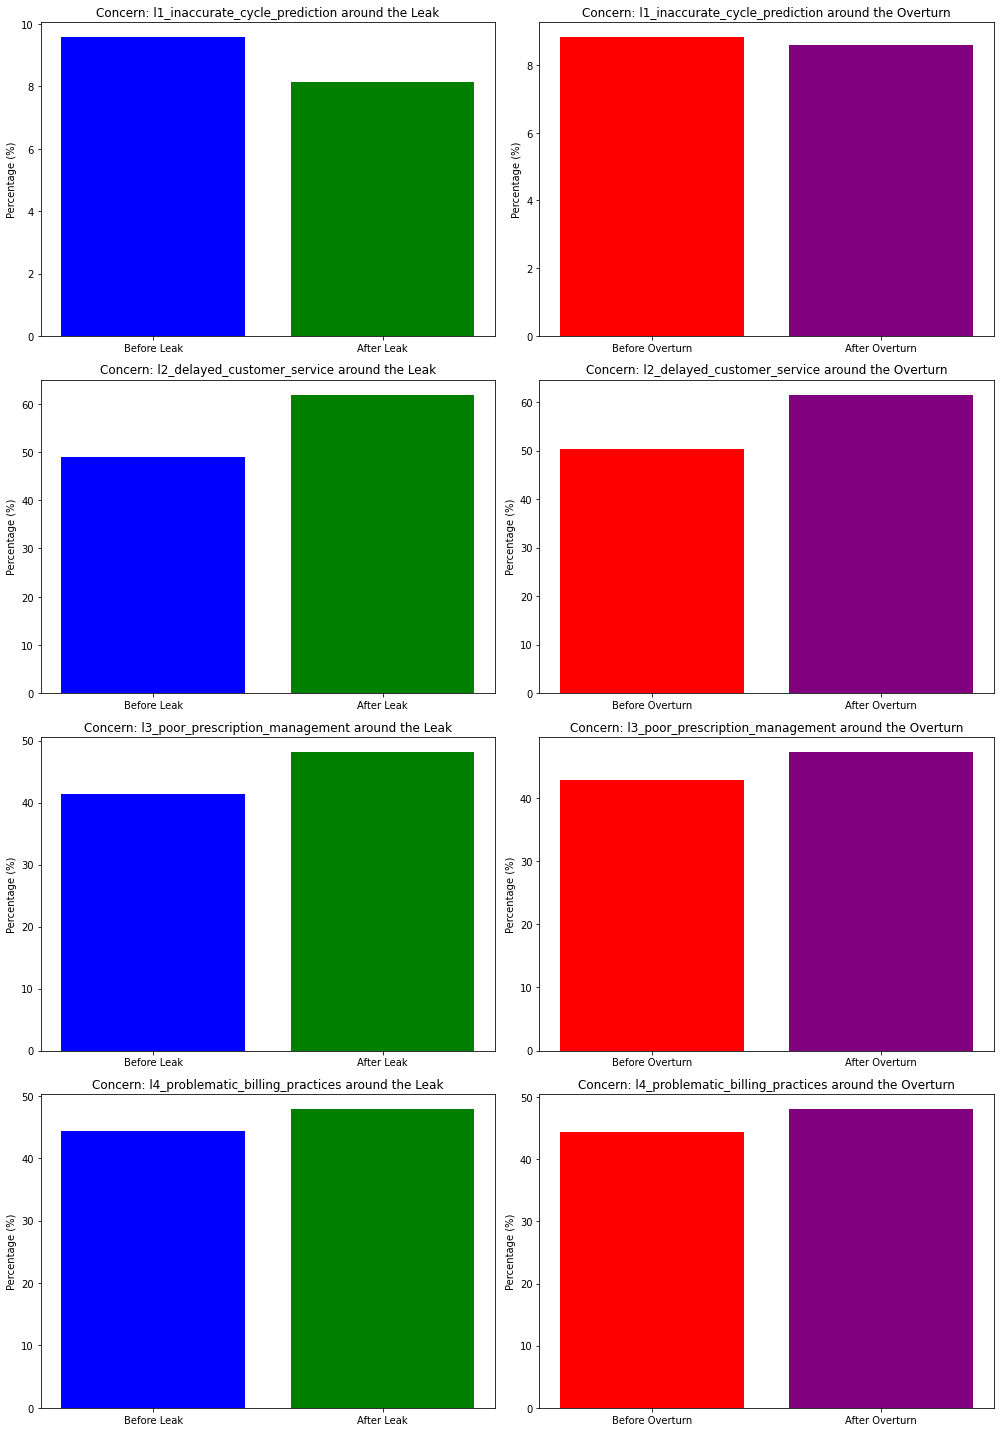

In [25]:
# Visualize the percentage of user concerns by dates - BY LABELS

import matplotlib.pyplot as plt

# Prepare a figure to plot
fig, axs = plt.subplots(len(labels), 2, figsize=(14, len(labels) * 5))

for i, label in enumerate(labels):
    # Calculate percentages for each label
    per_beforeLeak = before_leak[label].value_counts(normalize=True).get(1, 0) * 100
    per_afterLeak = after_leak[label].value_counts(normalize=True).get(1, 0) * 100
    per_beforeOverturn = before_overturn[label].value_counts(normalize=True).get(1, 0) * 100
    per_afterOverturn = after_overturn[label].value_counts(normalize=True).get(1, 0) * 100

    # Data for plotting
    periods = ['Before Leak', 'After Leak']
    values_leak = [per_beforeLeak, per_afterLeak]
    periods_overturn = ['Before Overturn', 'After Overturn']
    values_overturn = [per_beforeOverturn, per_afterOverturn]

    # Plot for leak
    axs[i, 0].bar(periods, values_leak, color=['blue', 'green'])
    axs[i, 0].set_title(f'Concern: {label} around the Leak')
    axs[i, 0].set_ylabel('Percentage (%)')

    # Plot for overturn
    axs[i, 1].bar(periods_overturn, values_overturn, color=['red', 'purple'])
    axs[i, 1].set_title(f'Concern: {label} around the Overturn')
    axs[i, 1].set_ylabel('Percentage (%)')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


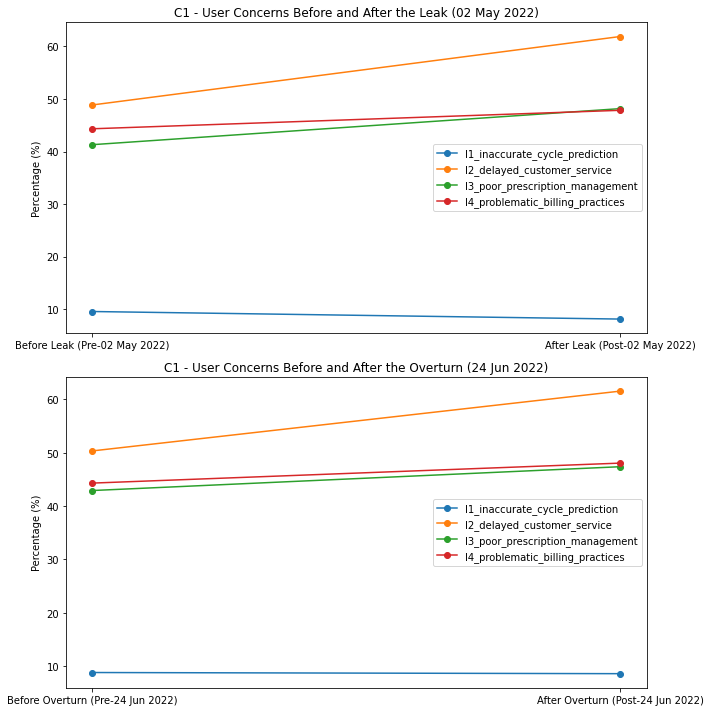

In [46]:
# Visualize the percentage of user concerns by dates - BY CUT-OFF DATES

# Prepare data for plotting
leak_percentages = []
overturn_percentages = []

for label in labels:
    leak_percentages.append([
        before_leak[label].value_counts(normalize=True).get(1, 0) * 100,
        after_leak[label].value_counts(normalize=True).get(1, 0) * 100
    ])
    overturn_percentages.append([
        before_overturn[label].value_counts(normalize=True).get(1, 0) * 100,
        after_overturn[label].value_counts(normalize=True).get(1, 0) * 100
    ])

# Create figure and axis objects
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting for leak
for idx, label in enumerate(labels):
    axs[0].plot(['Before Leak (Pre-02 May 2022)', 'After Leak (Post-02 May 2022)'], leak_percentages[idx], marker='o', label=label)
axs[0].set_title('C1 - User Concerns Before and After the Leak (02 May 2022)')
axs[0].set_ylabel('Percentage (%)')
axs[0].legend()

# Plotting for overturn
for idx, label in enumerate(labels):
    axs[1].plot(['Before Overturn (Pre-24 Jun 2022)', 'After Overturn (Post-24 Jun 2022)'], overturn_percentages[idx], marker='o', label=label)
axs[1].set_title('C1 - User Concerns Before and After the Overturn (24 Jun 2022)')
axs[1].set_ylabel('Percentage (%)')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

# Save the plot as a PNG file
fig.savefig('user_concern_evolution_c1.png', dpi=300)  # Specify figure object explicitly


### 3. Analyze the reviews' monthly growth rate

In [27]:
df = pd.read_csv('../2 Data Classification/OpenAI Classification/2 OpenAI classifier/c1_bc_GPT_tagged.csv')
df['date'] = pd.to_datetime(df['date'])

In [28]:
# Set 'date' as the index if it's not already
df.set_index('date', inplace=True)

In [29]:
# Resample data by month and count the number of reviews each month
monthly_review_counts = df['review'].resample('M').size() # M represents "month"
# Calculate the month-over-month growth rate in percentage
monthly_growth_rates = monthly_review_counts.pct_change().fillna(0) * 100
monthly_growth_rates

date
2020-05-31      0.000000
2020-06-30    -11.538462
2020-07-31     13.043478
2020-08-31     15.384615
2020-09-30    -53.333333
2020-10-31     57.142857
2020-11-30    -22.727273
2020-12-31     52.941176
2021-01-31    -46.153846
2021-02-28     42.857143
2021-03-31    -20.000000
2021-04-30     -6.250000
2021-05-31    -20.000000
2021-06-30     -8.333333
2021-07-31      0.000000
2021-08-31     18.181818
2021-09-30      0.000000
2021-10-31    -38.461538
2021-11-30     12.500000
2021-12-31    -11.111111
2022-01-31    150.000000
2022-02-28     -5.000000
2022-03-31    -31.578947
2022-04-30    -23.076923
2022-05-31    110.000000
2022-06-30      4.761905
2022-07-31     81.818182
2022-08-31    -42.500000
2022-09-30    -34.782609
2022-10-31    -26.666667
2022-11-30     72.727273
2022-12-31     26.315789
2023-01-31     79.166667
2023-02-28    -37.209302
2023-03-31     -7.407407
2023-04-30      8.000000
2023-05-31    -14.814815
2023-06-30     73.913043
2023-07-31     40.000000
2023-08-31    -41.07

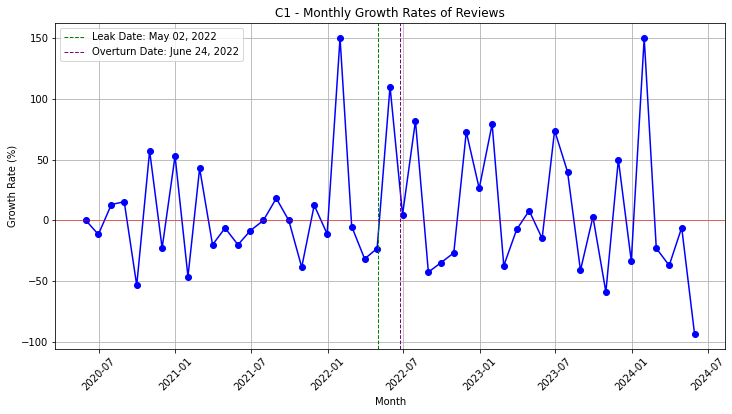

In [47]:
# Visualize the monthly growth rates

plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(monthly_growth_rates.index, monthly_growth_rates, marker='o', linestyle='-', color='b')
plt.title('C1 - Monthly Growth Rates of Reviews')  # Title of the plot
plt.xlabel('Month')  # X-axis label
plt.ylabel('Growth Rate (%)')  # Y-axis label
plt.grid(True)  # Add gridlines
plt.axhline(0, color='red', linewidth=0.5)  # Add a horizontal line at 0 for reference
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Add vertical lines for specific dates
plt.axvline(pd.Timestamp('2022-05-02'), color='green', linestyle='--', linewidth=1, label='Leak Date: May 02, 2022')
plt.axvline(pd.Timestamp('2022-06-24'), color='purple', linestyle='--', linewidth=1, label='Overturn Date: June 24, 2022')

# Add a legend to explain the lines
plt.legend()

# Save the plot as a PNG file
#plt.savefig('monthly_growth_rates_c1.png')

# Show the plot
plt.show()


### 4. Filter Key Words for Overturn

In [19]:
# Define the keywords to search for
keywords = ['overturn', 'roe', 'roe v. wade', 'abortion']

# Filter reviews that contain any of the keywords
bc_overturn_reviews = df[df['review'].str.contains('|'.join(keywords), case=False, na=False)]
bc_overturn_reviews

# Save the filtered reviews to a new CSV file
#bc_overturn_reviews.to_csv('bc_overturn_reviews.csv', index=False)


,Unnamed: 0,developerResponse,review,rating,isEdited,userName,title,app_name,app_id,category,probability,l1_inaccurate_cycle_prediction,l2_delayed_customer_service,l3_poor_prescription_management,l4_problematic_billing_practices
date,,,,,,,,,,,,,,,
2023-01-15 19:52:55,10,"{'id': 34362647, 'body': ""We're deeply saddene...",Nurx used to be super helpful when I first sta...,1,False,777xxxxx777,No longer worth it,nurx-birth-control-delivered,1213141301,- l2_delayed_customer_service\n- l3_poor_presc...,0.917712,0,1,1,0
2023-01-25 02:14:21,748,"{'id': 34663841, 'body': ""Hello, we're truly s...",I’ve been charged for orders I haven’t receive...,1,False,Nokes362,Pretty terrible,nurx-birth-control-delivered,1213141301,- l2_delayed_customer_service\n- l4_problemati...,0.990018,0,1,0,1
2023-06-01 00:50:08,2577,"{'id': 36904509, 'body': ""Hello, we're truly s...",I’d been using Nurx since 2020. They’re extrem...,1,False,2suns-in-the-sunset,"Terrible Service, Waste of Money.",nurx-birth-control-delivered,1213141301,- l2_delayed_customer_service\n- l3_poor_presc...,0.972844,0,1,1,1
2023-01-27 05:17:34,197,"{'id': 34595216, 'body': 'Hi,\n\nWe’re so sorr...",Found this app to aid in our natural family pl...,1,False,DontUseThisApp!,"Promotes killing your children, nothing natura...",natural-cycles-birth-control,765535549,The review does not clearly fit into any of th...,0.667054,0,0,0,0
2020-09-05 23:58:38,521,NaN,"In the initial setup steps, the app asks if yo...",2,False,ecmanaut,Not a confidence-inspiring start,natural-cycles-birth-control,765535549,- l1_inaccurate_cycle_prediction,0.720260,1,0,0,0
